In [148]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import seaborn as sns

%matplotlib inline

In [104]:
data = pd.read_csv("dataset/creditcard.csv")
data.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [105]:
data.shape

(284807, 31)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [107]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Confirming Class Imbalance

In [108]:
normal = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]

In [109]:
fraud_percentage = data["Class"].value_counts(normalize=True) * 100
print(fraud_percentage)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


<Axes: title={'center': 'Class Distribution of normal = 0 & fraud = 1'}, xlabel='Class'>

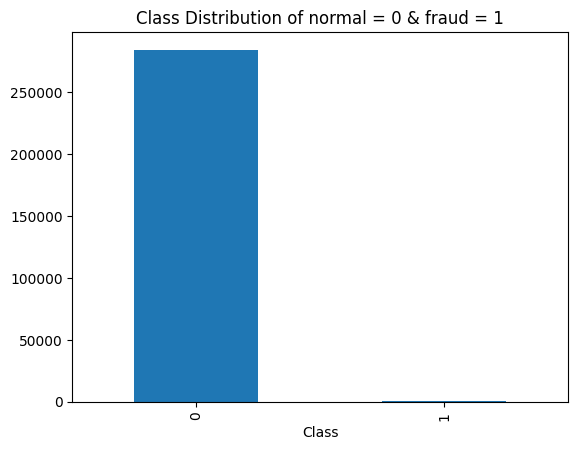

In [110]:
data["Class"].value_counts().plot(kind='bar', title="Class Distribution of normal = 0 & fraud = 1")

Comparing Amount for Fraud vs Normal

In [111]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [112]:
normal["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

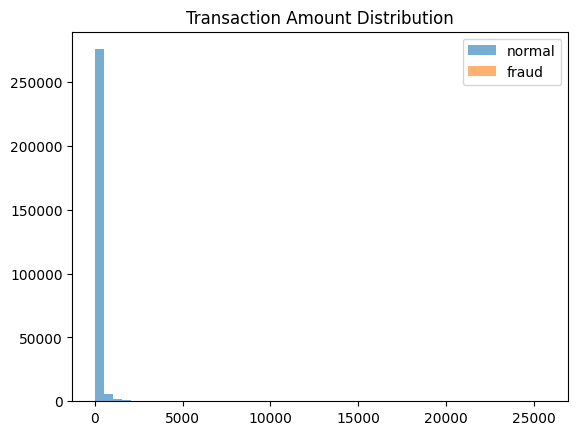

In [113]:
plt.hist(normal["Amount"], bins=50, alpha=0.6, label="normal")
plt.hist(fraud["Amount"], bins=50, alpha=0.6, label="fraud")
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

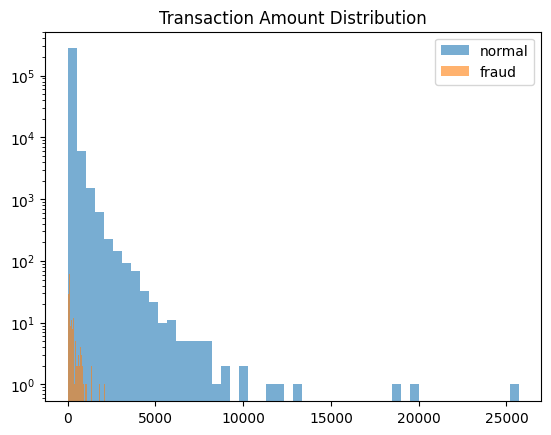

In [114]:
plt.hist(normal["Amount"], bins=50, alpha=0.6, label="normal", log=True)
plt.hist(fraud["Amount"], bins=50, alpha=0.6, label="fraud", log=True)
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

/tmp/ipykernel_4637/1141607535.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([normal["Amount"], fraud["Amount"]], labels=["normal", "fraud"], showfliers=True)


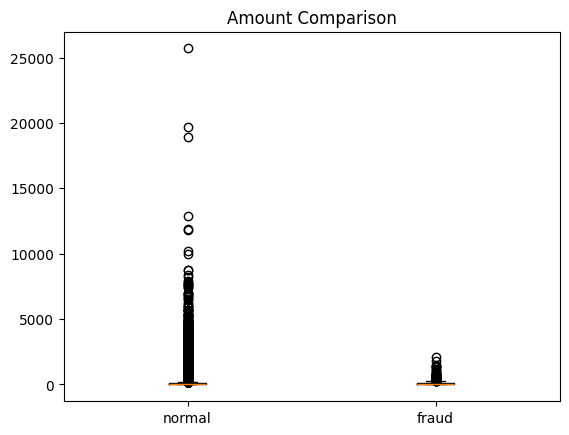

In [115]:
plt.boxplot([normal["Amount"], fraud["Amount"]], labels=["normal", "fraud"], showfliers=True)
plt.title("Amount Comparison")
plt.show()

Fraudulent transactions show a different amount distribution compared to normal transactions. While many fraud transactions involve relatively small amounts, they also exhibit higher variance and more extreme values. This suggests that transaction amount is a useful but insufficient standalone feature.

# TIME-BASED FRAUD ANALYSIS

In [116]:
data["time_hours"] = data["Time"] / 3600

Text(0.5, 1.0, 'Transaction Amount over Time')

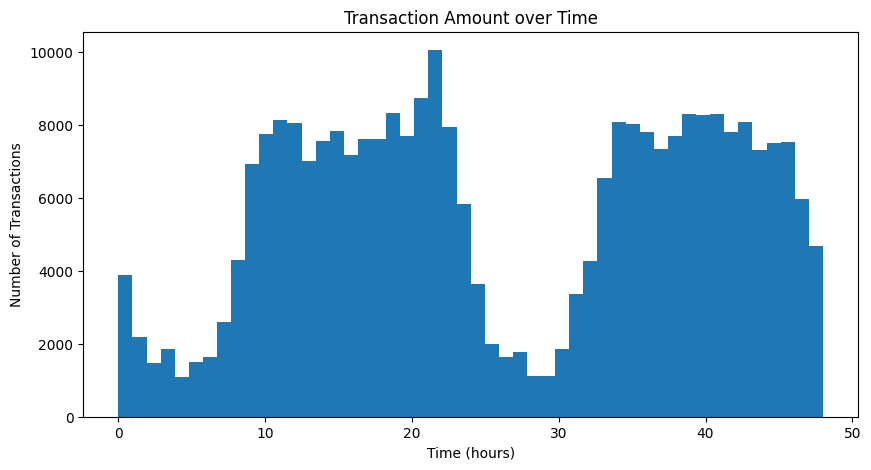

In [117]:
plt.figure(figsize=(10, 5))
plt.hist(data["time_hours"], bins=50)
plt.xlabel("Time (hours)")
plt.ylabel("Number of Transactions")
plt.title("Transaction Amount over Time")

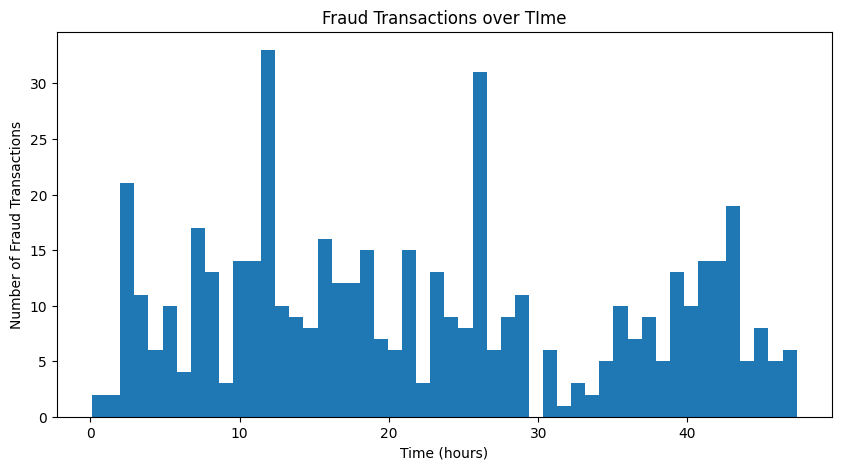

In [118]:
fraud_data = data[data["Class"] == 1]

plt.figure(figsize=(10, 5))
plt.hist(fraud_data["time_hours"], bins=50)
plt.xlabel("Time (hours)")
plt.ylabel("Number of Fraud Transactions")
plt.title("Fraud Transactions over TIme")
plt.show()

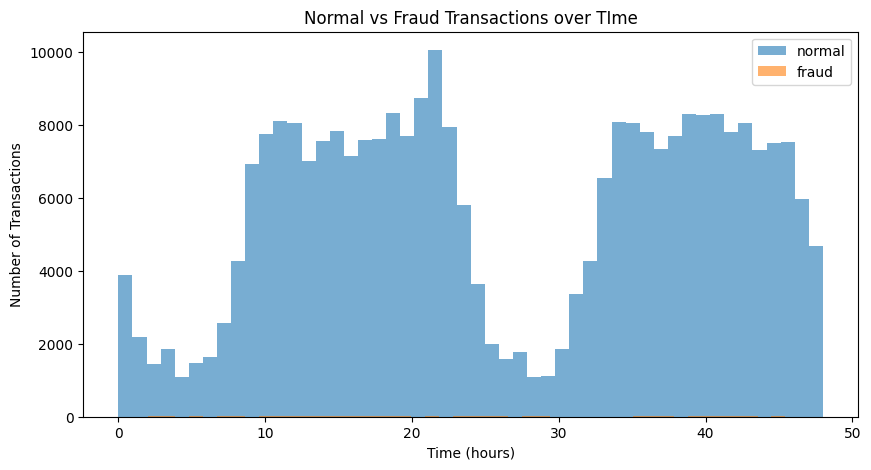

In [119]:
plt.figure(figsize=(10, 5))

plt.hist(data[data["Class"] == 0]["time_hours"], bins=50, alpha=0.6, label="normal")
plt.hist(data[data["Class"] == 1]["time_hours"], bins=50, alpha=0.6, label="fraud")

plt.xlabel("Time (hours)")
plt.ylabel("Number of Transactions")
plt.title("Normal vs Fraud Transactions over TIme")
plt.legend()
plt.show()

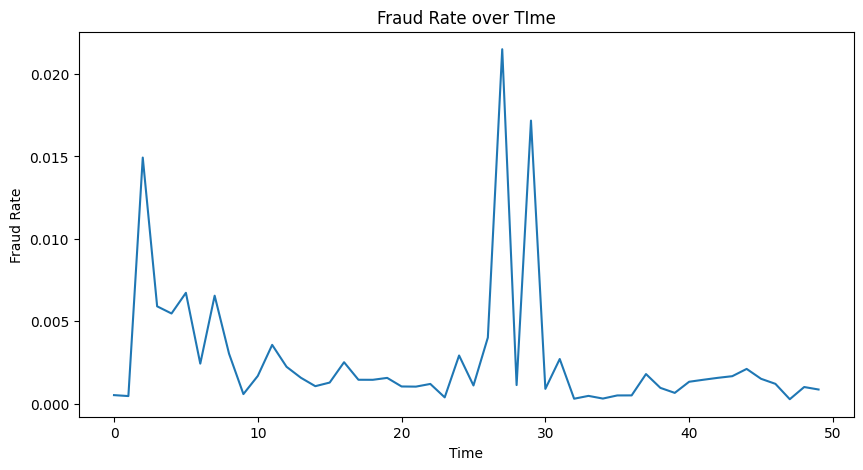

In [120]:
data["time_bin"] = pd.cut(data["time_hours"], bins=50, labels=False)

fraud_rate = data.groupby("time_bin")["Class"].mean()

plt.figure(figsize=(10, 5))
fraud_rate.plot()
plt.ylabel("Fraud Rate")
plt.xlabel("Time")
plt.title("Fraud Rate over TIme")
plt.show()

Fraud transactions are sparse but show temporal clustering, indicating that time-aware splitting is necessary to avoid data leakage.

In [150]:
data_sorted = data.sort_values("Time").reset_index(drop=True)

data_sorted["time_diff"] = data_sorted["Time"].diff().fillna(0)

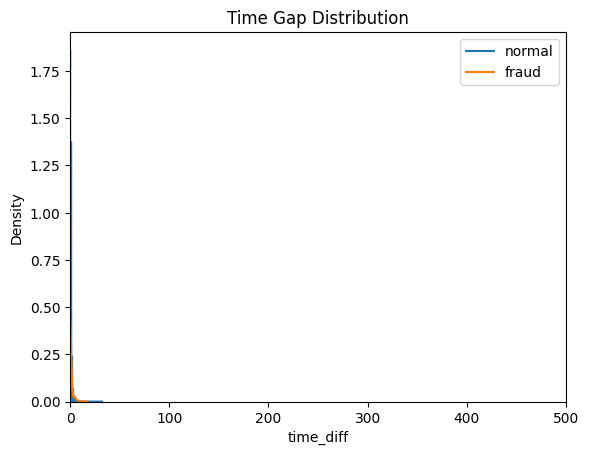

In [151]:
sns.kdeplot(data_sorted[data_sorted["Class"] == 0]["time_diff"], label='normal')
sns.kdeplot(data_sorted[data_sorted["Class"] == 1]["time_diff"], label='fraud')
plt.xlim(0, 500)
plt.legend()
plt.title("Time Gap Distribution")
plt.show()

# TRAIN-TEST SPLIT OF DATA

In [121]:
# Data will have to split based on time, as transactions in the real world are based on future transactions
data = data.sort_values("Time").reset_index(drop=True)
split_index = int(0.7 * len(data))

In [122]:
# The first 70% of the data will be used as the training set and the last 30 % of the data will be used as the test set
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [123]:
X_train = train_data.drop("Class", axis=1)
y_train = train_data["Class"]

X_test = test_data.drop("Class", axis=1)
y_test = test_data["Class"]

In [124]:
print("Train fraud rate:", y_train.mean())
print("Test fraud rate:", y_test.mean())

Train fraud rate: 0.0019261250777472363
Test fraud rate: 0.0012640005617780275


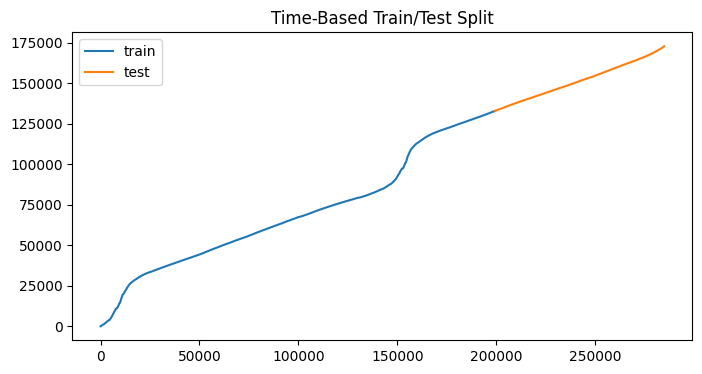

In [125]:
plt.figure(figsize=(8, 4))
plt.plot(train_data["Time"], label="train")
plt.plot(test_data["Time"], label="test")
plt.legend()
plt.title("Time-Based Train/Test Split")
plt.show()

In [131]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[["Time","Amount"]] = scaler.fit_transform(X_train[["Time", "Amount"]])
X_test_scaled[["Time", "Amount"]] = scaler.transform(X_test[["Time", "Amount"]])

In [141]:
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=5000,
)

log_reg.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [144]:
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report", classification_report(y_test, y_pred, digits=4))

ROC-AUC: 0.9782224848038993
Confusion Matrix:  [[83614  1721]
 [   13    95]]
Classification Report               precision    recall  f1-score   support

           0     0.9998    0.9798    0.9897     85335
           1     0.0523    0.8796    0.0988       108

    accuracy                         0.9797     85443
   macro avg     0.5261    0.9297    0.5442     85443
weighted avg     0.9986    0.9797    0.9886     85443



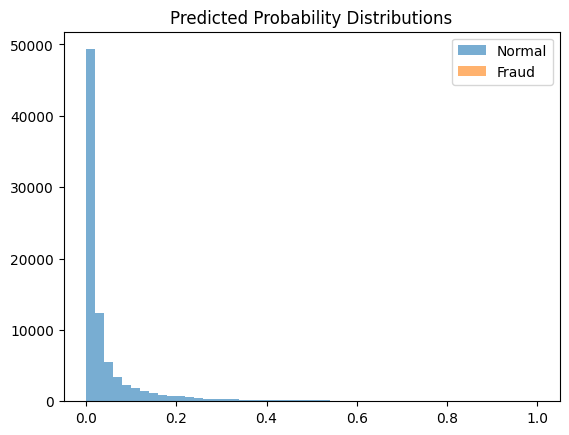

In [145]:

fraud_scores = y_proba[y_test == 1]
normal_scores = y_proba[y_test == 0]

plt.hist(normal_scores, bins=50, alpha=0.6, label='Normal')
plt.hist(fraud_scores, bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Predicted Probability Distributions")
plt.show()

In [146]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

random_forest.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [147]:
y_pred_rf = random_forest.predict(X_test_scaled)
y_proba_rf = random_forest.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_rf))
print("Classification Report", classification_report(y_test, y_pred_rf, digits=4))

ROC-AUC: 0.919272627053725
Confusion Matrix:  [[85335     0]
 [   45    63]]
Classification Report               precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     85335
           1     1.0000    0.5833    0.7368       108

    accuracy                         0.9995     85443
   macro avg     0.9997    0.7917    0.8683     85443
weighted avg     0.9995    0.9995    0.9994     85443

